### Сборный проект

#### Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Мы выгрузили таблицу и присвоили переменной data, импортировали все необходимые библиотеки, которые будут нужны для дальнейшей работы. Далее мы с помощью метода info () проверили какие типы данные в каждом столбце и выяснили, что необходимо изменить тип данных в двух столбцах: Year_of_Release, User_Score. Названия всех столбцов необходимо привести к нижнему регистру.

#### Шаг 2. Предобработка данных

##### Приведем названия столбцов к нижнему регистру.

In [3]:
data.columns = [x.lower() for x in data.columns]
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


##### Проверим на наличияе дубликатов

In [4]:
data.duplicated().sum()

0

##### Обработаем пропуски в столбцах

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в столбце 'name' отбросим, т.к. их всего два и достоверно восстановить значения мы не можем.

In [6]:
data = data.dropna(subset = ['name'])

Пропуски в столбце 'year_of_release' можем заполнить медианным годом выхода этой же игры на других платформах (если он есть). Если медианное значение получается не целым, при дальшейшем преобразовании типа данных столбца округлим до меньшего целого. Оставшиеся пропуски в этом столбце отбросим, т.к. данные без года выпуска игры нам не пригодятся.

In [7]:
for i in data['name'].unique():
    data.loc[(data['name'] == i) & (data['year_of_release'].isna()), 'year_of_release'] = data.loc[(data['name'] == i) & (data['year_of_release'].notna()), 'year_of_release'].median()
data['year_of_release'].dropna(inplace=True)

Столбец rating содержит данные с возрастным рейтингом от организации ESRB, которая действует только в Северной Америке (NA), пропуски в этом столбце могут означать либо, что игру не планировалось выпускать на NA рынок, либо что оценка просто не была произведена, т.к. это необязательная процедура.  
Оставим пропуски.

Пропуски в столбце с оценками критиков (critic_score) мы не можем достоверно восполнить, оставим строки с пропусками.

Изучим уникальные значения в столбце с оценками пользователей (user_score)

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

значение tbd (расшифровывается как "to be defined") означает, что по какой-то причине оценка не была произведена. Заменим это значение и Nan на 11.11 (заведомо неправильное значение при рейтинге до 10.0), при дальшейшем анализе, испульзуя данный столбец, эти значения мы отбросим (пока нам пригодится остальная информация из этих строк, поэтому удалять не будем).

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '11.1'
data['user_score'].fillna('11.11', inplace=True)

##### Преобразуем данные в нужные типы. 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Столбцы "year_of_release" сожержат целочисленные значения, подойдет тип данных int64.

In [11]:
data['year_of_release'] = data['year_of_release'].round(0).astype('Int64')

Столбец 'critic_score' содержит целочисленные значения, но для дальнейшего рассчета корреляции нам понадобится тип float. Поэтому оставим этот тип данных в столбце.

столбец "user_score" содержит числа с плавающей точкой, поменяем тип данных на float64.

In [12]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')

Тип данных в остальных столбцах нас устраивает.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


 #### Шаг 3. Исследовательский анализ данных

##### Посмотрим сколько игр выпускалось в разные годы.

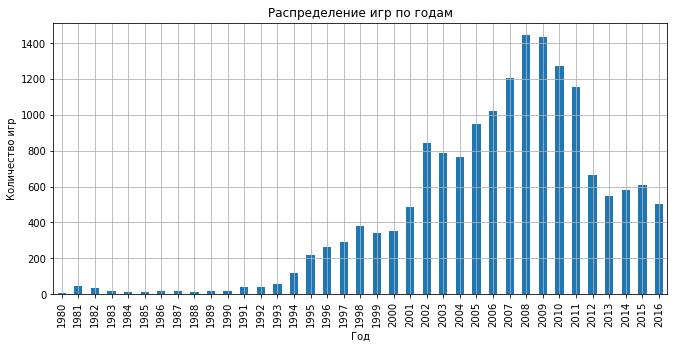

Развитие игровой индустрии сильно связано с появлением Pentium 1 в 1994 году, примерно с этого момента количество игровых платформ, а также и самих игр стремительно росло (с пиком в 2007 г.). Однако после 2007 г. наблюдается спад в количестве выпускаемых игр, который можно связать с тем, что в следствие развития индустрии и сильной конкуренции, упор стал делаться на создание больших и проработанных игр, в которые пользователи могут играть по несколько лет. Выражаясь другими словами, качество стало важнее количества.  
Данные до 1994 года являются неактуальными и немногочисленными, что позволяет нам смело отбросить временной промежуток до 1994 г.

In [15]:
data = data.query('year_of_release >=1994')

Добавим столбец 'sum_sales'  с суммарными продажами по всем регионам для каждой игры.

In [16]:
data['sum_sales'] = data['na_sales'] +data['eu_sales'] + data['jp_sales'] + data['other_sales']

#####  Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройм распределение по годам. 

In [17]:
platforms = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
platforms.columns = ['sales']
platforms.sort_values(by = 'sales', ascending=False, inplace=True)
platforms.head(10)

,sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.26
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Возьмем первые 6 платформ с самыми большими суммарными продажами (PS2, X360, PS3, Wii, DS, PS) и построим распределение продаж по годам для каждой платформы.

Text(0.5, 1.0, 'Распределение суммарных продаж топ-6 платформ по годам')

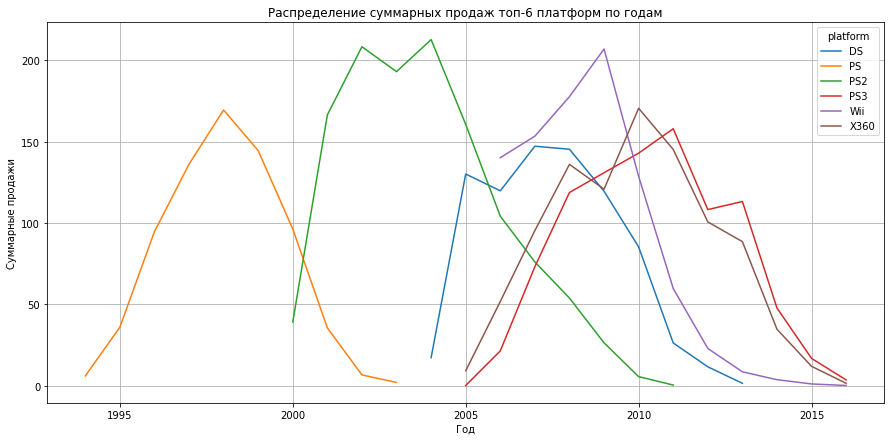

In [18]:
top_list = ["PS", "PS2", "PS3", "X360", "Wii", "DS"]

ax = data.query('platform in @top_list').pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
ax.set_xlabel('Год')
ax.set_ylabel('Суммарные продажи')
ax.set_title('Распределение суммарных продаж топ-6 платформ по годам')

PS - Просуществовала в период от 1994 г. до 2003 г. (9 лет, с пиком популярности в 1998 г.). PS2 появилась в 2000 г. и довольно быстро вытеснила PS, просуществовала до 2010 года (10 лет), постепенно уступая в популярности вышедшей в 2006 г. PS3, которая в свою очередь была популярна до 2013 года (7 лет), что можно связать с выходом PS4. Судя по этим данным, срок актуальности одного поколения игровой консоли PlayStation состовляет от 7 до 10 лет.   
X360 - Появилась в 2005 г. с пиком популярности в 2010 г., после 2014 года (вплоть до настоящего мемента)  объем выпускаемых игр существенно снизился.  
Wii - Была популярна с 2006 г., после 2012 года (вплоть до настоящего момента) объем выпускаемых игр существенно снизился.  
DS - Появилась в 2004 г. и просуществовала до 2013 г. 

В целом можно заключить, что "срок жизни" консоли не превышает 10 лет, и судя по всему частота выхода новых консолей будет в дальнейшем только наростать. 

##### Определим актуальный период для дальнейшего составления прогноза

Учитывая динамически меняющийся характер игровой индустрии, актуальным периодом можно обозначить промежуток с 2014 года до 2016 года (с начала спада рынка до настоящего времени)

Данные до 2014 года отбросим.

In [19]:
data = data.query('year_of_release >=2014')

##### Определим какие платформы лидируют по продажам. Выберем несколько потенциально прибыльных платформ.

Рассмотрим 2016 год.

In [20]:
data_2016 = (data.query('year_of_release == 2016')
               .pivot_table(index='platform', values = 'sum_sales', aggfunc = 'sum')
               .reset_index()
          )
data_2016.columns = ['platform','sales']
data_2016.sort_values(by = 'sales', ascending=False, inplace=True)
data_2016

,platform,sales
3,PS4,69.25
8,XOne,26.15
0,3DS,15.14
1,PC,5.25
6,WiiU,4.60
4,PSV,4.25
2,PS3,3.60
7,X360,1.52
5,Wii,0.18


Самая продающая (с большим отрывом) платформа на данный момент это PS4. Затем следуют XOne (2-е место) и 3DS (3-е местро).

А теперь для сравнения посмотрим данные за 2015 и 2014 годы.

In [21]:
data_2015 = (data.query('year_of_release == 2015')
               .pivot_table(index='platform', values = 'sum_sales', aggfunc = 'sum')
               .reset_index()
          )
data_2015.columns = ['platform','sales']
data_2015.sort_values(by = 'sales', ascending=False, inplace=True)
data_2015

,platform,sales
3,PS4,118.90
9,XOne,60.14
0,3DS,27.78
2,PS3,16.82
7,WiiU,16.35
8,X360,11.96
1,PC,8.52
5,PSV,6.25
6,Wii,1.14
4,PSP,0.12


и за 2014 год

In [22]:
data_2014 = (data.query('year_of_release == 2014')
               .pivot_table(index='platform', values = 'sum_sales', aggfunc = 'sum')
               .reset_index()
          )
data_2014.columns = ['platform', 'sales']
data_2014.sort_values(by = 'sales', ascending=False, inplace=True)
data_2014

,platform,sales
3,PS4,100.00
9,XOne,54.07
2,PS3,47.76
0,3DS,43.76
8,X360,34.74
7,WiiU,22.03
1,PC,13.63
5,PSV,11.90
6,Wii,3.75
4,PSP,0.24


Продажи в 2016 году на всех предоставленных платформах ниже, по сравнению с 2015 годом, что может говорить о кризисе рынка игровой индустрии в целом или о неполноте данных за 2016 год.

Учитывая, что данные за 2016 год неполные. Для лучшего выявления растущих по продажам платформ, сравним вместе данные за 2014 г. и за 2015 г.

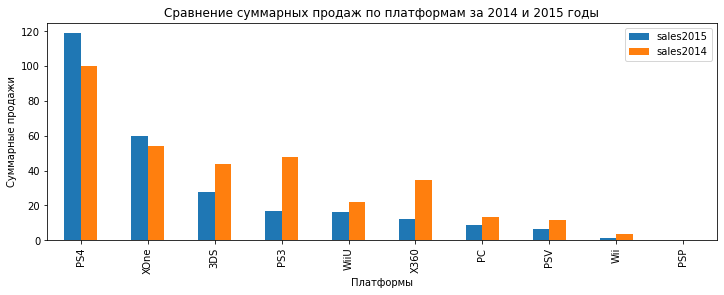

In [23]:
data_years=data_2015.merge(data_2014, on='platform', how='left', suffixes=('2015', '2014'))
ax = data_years.plot.bar(x='platform', figsize=(12,4));
ax.set_title('Сравнение суммарных продаж по платформам за 2014 и 2015 годы');
ax.set_ylabel('Суммарные продажи');
ax.set_xlabel('Платформы');

По данному графику видно, что лишь у двух платформ (PS4 и X0ne) продажи за 2015г. превысили продажи за 2014г. Можно определить их как самые потенциально выгодные.

##### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

Построим "ящик с усами"

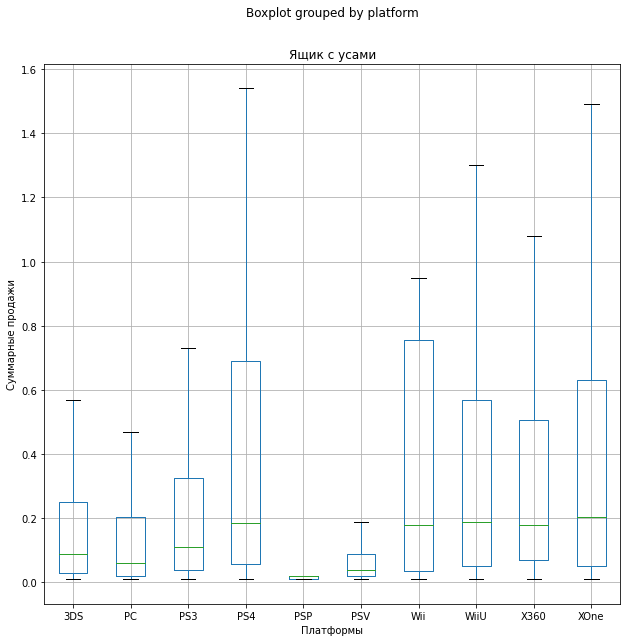

In [24]:
ax = data.boxplot(column='sum_sales', by='platform', figsize=(10,10), showfliers=False)
ax.set_title('Ящик с усами');
ax.set_ylabel('Суммарные продажи');
ax.set_xlabel('Платформы');
plt.show()

Медианные продажи довольно сильно отличаются от платформе к платформе. Лидирует XOne, затем идут WiiU, PS4, Wii и X360.

##### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Для анализа возьмем самую популярную платформу на данный момент - PS4. Построим диаграмму рассеяния, и посчитаем коэффициент корреляции между оценками пользователей и суммарными продажами игр.

-0.07215944542890686


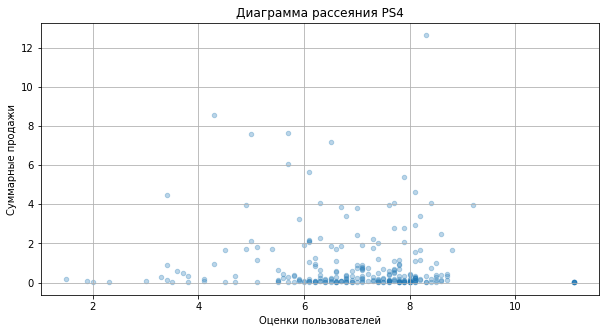

In [25]:
print(data[(data['platform']=='PS4')&(data['user_score'] != 11.11)]['user_score'].corr(data[(data['platform']=='PS4')&(data['user_score'] != 11.11)]['sum_sales']))
ax = data[(data['platform']=='PS4')&(data['user_score'] != 11.11)].plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True);
ax.set_title('Диаграмма рассеяния PS4');
ax.set_ylabel('Суммарные продажи');
ax.set_xlabel('Оценки пользователей');


Коэффициент корреляции между оценкой пользователей и суммарными продажами = -0.07, что говорит о незначительной отрицательной корреляции.

Теперь Построим диаграмму рассеяния, и посчитаем коэффициент корреляции между оценками критиков и суммарными продажами игр.

0.40266141068104083


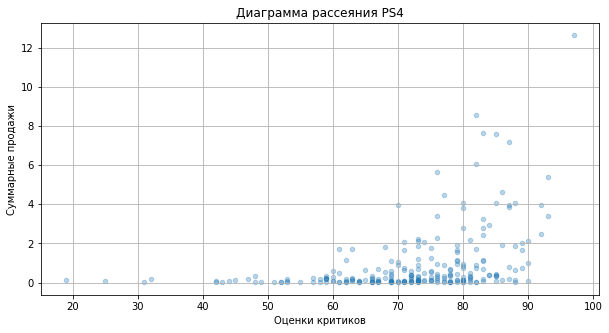

In [26]:
print(data[data['platform']=='PS4']['critic_score'].corr(data[data['platform']=='PS4']['sum_sales']))
ax = data[(data['platform']=='PS4')&(data['critic_score'].notna())].plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(10,5), grid=True);
ax.set_title('Диаграмма рассеяния PS4');
ax.set_ylabel('Суммарные продажи');
ax.set_xlabel('Оценки критиков');

Коэффициент корреляции между оценкой критиков и суммарными продажами = 0.40, что говорит о нерезкой положительной корреляции.

Соотнесем выводы с продажами игр на самых продаваемых платформах (предварительно определим, что это за платформы и добавим их в список top_list).

In [27]:
data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(10)

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.40
PSV,22.40
Wii,5.07


Возьмем топ-6 платформ : PS4, XOne, 3DS, PS3, X360, WiiU.

In [28]:
top_list = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']

In [29]:
for i in top_list:
    a = data[(data['platform']==i)&(data['user_score'] != 11.11)]['user_score'].corr(data[(data['platform']==i)&(data['user_score'] != 11.11)]['sum_sales'])
    b = data[data['platform'] == i]['critic_score'].corr(data[data['platform'] == i]['sum_sales'])
    print(f'Корелляция между оценкой пользователей и суммарными продажами  у платформы {i} составляет {a}')
    print(f'Корелляция между оценкой критиков и суммарными продажами у платформы {i} составляет {b}')
    print('')

Корелляция между оценкой пользователей и суммарными продажами  у платформы PS4 составляет -0.07215944542890686
Корелляция между оценкой критиков и суммарными продажами у платформы PS4 составляет 0.40266141068104083

Корелляция между оценкой пользователей и суммарными продажами  у платформы XOne составляет -0.15320871039787662
Корелляция между оценкой критиков и суммарными продажами у платформы XOne составляет 0.42867694370333226

Корелляция между оценкой пользователей и суммарными продажами  у платформы 3DS составляет -0.11662726200995262
Корелляция между оценкой критиков и суммарными продажами у платформы 3DS составляет 0.314117492869051

Корелляция между оценкой пользователей и суммарными продажами  у платформы PS3 составляет -0.2990555404540884
Корелляция между оценкой критиков и суммарными продажами у платформы PS3 составляет 0.44657460493190704

Корелляция между оценкой пользователей и суммарными продажами  у платформы X360 составляет -0.20498217581922656
Корелляция между оценкой 

На всех популярных платформах наблюдается слабая корреляция - от отрицательной (-0.3 у PS3), до положительной (0.2 у WiiU) - между отзывами пользователей и суммарными продажами.  
Также на всех платформах определяется нерезкая положительная корреляция (от 0.31 у 3DS, до 0.53 у X360) между оценками критиков и суммарными продажами. 

Видимо при выборе платформы покупатели больше ориентируются на отзывы критиков.

##### Посмотрим на общее распределение игр и продаж по жанрам. 

genre
Action          620
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: games, dtype: int64

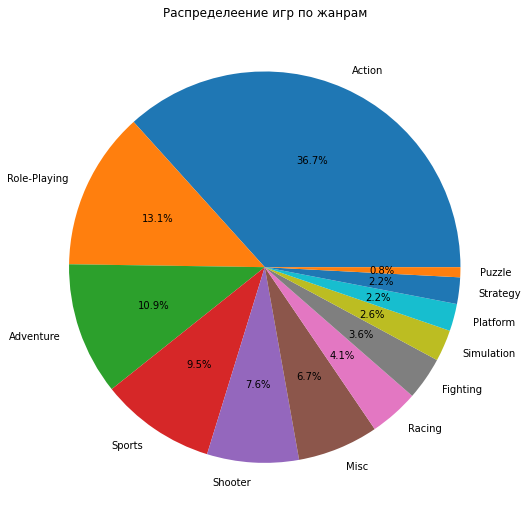

In [30]:
genre_data = data.pivot_table(index='genre', values=['name', 'sum_sales'], aggfunc={'name':'count', 'sum_sales':'median'})
genre_data.columns = ['games', 'median_sale']
genre_data = genre_data.sort_values(by='games', ascending=False)

ax = genre_data.plot(y='games', kind='pie', figsize=(9,9), autopct='%1.1f%%', legend = False, title = 'Распределеение игр по жанрам')
ax.set_ylabel('');

genre_data['games']

Как мы видим, больше всего игр в жанре Action (28.5%), затем идут Misc (11.0%), Sports (10.9%), Role-Playing(10.7%) и Adventure (10.6%), каждый из остальных жанров составляет не более 10% от общего числа, с наименее распространенным жанром - Puzzle (2.2%).

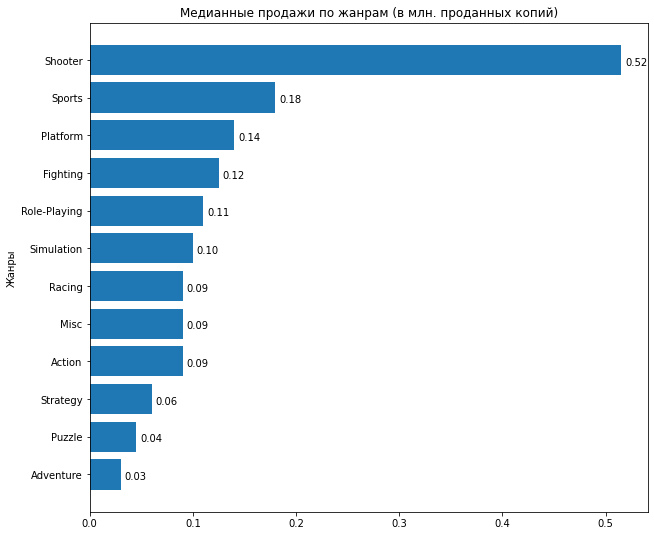

In [31]:
genre_data = genre_data.sort_values(by='median_sale', ascending=True)

xs = genre_data.index
ys = genre_data['median_sale']

plt.figure(figsize=(10,9));
plt.barh(xs,ys)

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, 
                 (y,x), 
                 textcoords="offset points", 
                 xytext=(15,-5), 
                 ha='center')
plt.title('Медианные продажи по жанрам (в млн. проданных копий)')
plt.ylabel('Жанры');
plt.xlabel('');

Как мы видим больше всего продается копий игр в жанре Shooter (0.38) с большим отрывом от занимающего второе место жанра Platform (0.21). Меньше всего копий игр продается в жанре Adventure (0.03).

#### Шаг 4. Составим портрет пользователя каждого региона (NA, EU, JP):

##### Самые популярные платформы (топ-5):

Создадим датафрейм (regions) с данными о продажах во всех регионах.

In [32]:
regions = data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'], aggfunc='sum')

regions.rename(columns={'na_sales':'NA', 'eu_sales':'EU', 'jp_sales':'JP', 'other_sales':'other', 'sum_sales':'sum'}, inplace=True)

In [33]:
regions.head()

,EU,JP,NA,other,sum
platform,,,,,
3DS,16.12,44.24,22.64,3.68,86.68
PC,18.22,0.00,7.29,1.89,27.40
PS3,25.54,11.22,22.05,9.37,68.18
PS4,130.04,15.02,98.61,44.48,288.15
PSP,0.00,0.36,0.00,0.00,0.36


###### На мировом рынке

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: sum, dtype: float64

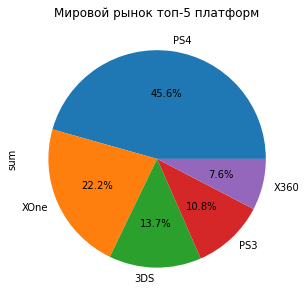

In [34]:
regions['sum'].sort_values(ascending=False).head().plot(y='sum', kind='pie', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'Мировой рынок топ-5 платформ')
ax.set_ylabel('')
regions['sum'].sort_values(ascending=False).head()

Самые популярные платформы на мировом рынке PS4, XOne, 3DS, PS3 и X360.

###### в Северной Америке (NA)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: NA, dtype: float64

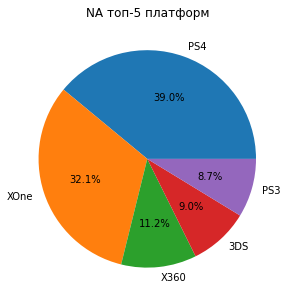

In [35]:
ax = regions['NA'].sort_values(ascending=False).head().plot(y='NA', kind='pie', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'NA топ-5 платформ')
ax.set_ylabel('')
regions['NA'].sort_values(ascending=False).head()

Самыми распространенными платформами в Северной Америке являются PS4, XOne, X360, 3DS и PS3.

###### в Европе (EU)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       18.22
3DS      16.12
Name: EU, dtype: float64

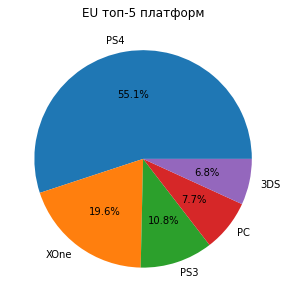

In [36]:
ax = regions['EU'].sort_values(ascending=False).head().plot(y='EU', kind='pie', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'EU топ-5 платформ')
ax.set_ylabel('')
regions['EU'].sort_values(ascending=False).head()

Самыми распространенными платформами в Европе являются PS4, XOne, PS3, PC и 3DS

######  в Японии (JP)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: JP, dtype: float64

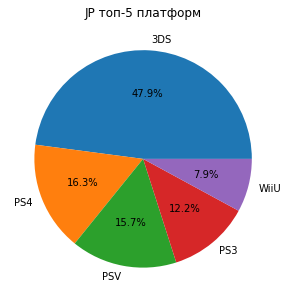

In [37]:
ax = regions['JP'].sort_values(ascending=False).head().plot(y='JP', kind='pie', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'JP топ-5 платформ')
ax.set_ylabel('')
regions['JP'].sort_values(ascending=False).head()

Самыми распространенными платформами в Японии являются 3DS, PS4, PSV, PS3 и WiiU.

##### Самые популярные жанры (топ-5).

Создадим датафрейм (genres) с данными о жанрах во всех регионах.

In [38]:
genres = data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'], aggfunc='sum')

genres.rename(columns={'na_sales':'NA', 'eu_sales':'EU', 'jp_sales':'JP', 'other_sales':'other', 'sum_sales':'sum'}, inplace=True)

###### На мировом рынке

genre
Action          199.71
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Name: sum, dtype: float64

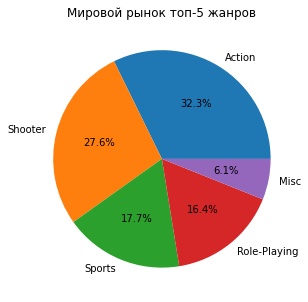

In [39]:
ax = genres['sum'].sort_values(ascending=False).head().plot(y='sum', kind='pie', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'Мировой рынок топ-5 жанров')
ax.set_ylabel('')
genres['sum'].sort_values(ascending=False).head()

Самые популярные жанры на мировом рынке это Action, Shooter, Sports, Role-Playing и Misc.

###### в Северной Америке (NA)

genre
Shooter         79.02
Action          72.59
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: NA, dtype: float64

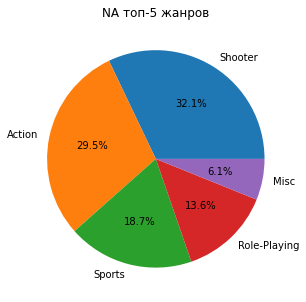

In [40]:
ax = genres['NA'].sort_values(ascending=False).head().plot(y='NA', kind='pie', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'NA топ-5 жанров')
ax.set_ylabel('')
genres['NA'].sort_values(ascending=False).head()

Самые популярные жанры в Северной Америке это Shooter, Action, Sports, Role-Playing и Misc

###### в Европе (EU)

genre
Action          74.93
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: EU, dtype: float64

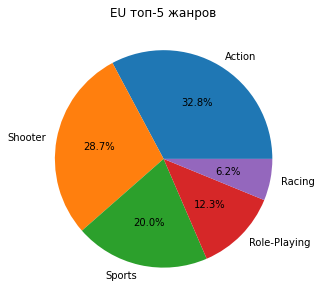

In [41]:
ax = genres['EU'].sort_values(ascending=False).head().plot(y='EU', kind='pie', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'EU топ-5 жанров')
ax.set_ylabel('')
genres['EU'].sort_values(ascending=False).head()

Самые популярные жанры в Европе это Action, Shooter, Sports, Role-Playing и Racing 
.

###### в Японии (JP)

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: JP, dtype: float64

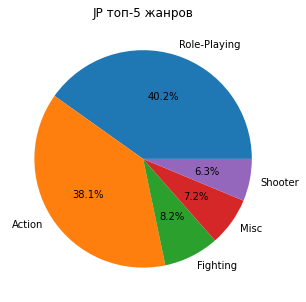

In [42]:
ax = genres['JP'].sort_values(ascending=False).head().plot(y='JP', kind='pie', figsize=(5,5), autopct='%1.1f%%', legend = False, title = 'JP топ-5 жанров')
ax.set_ylabel('')
genres['JP'].sort_values(ascending=False).head()

Самые популярные жанры в Японии это Role-Playing, Action, Fighting, Misc и Shooter.

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

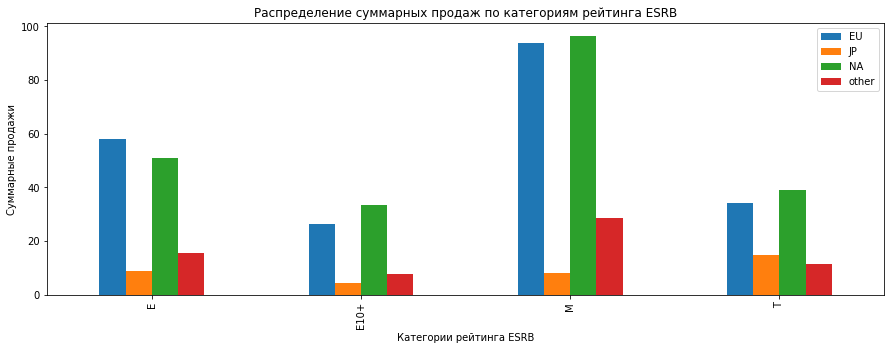

In [43]:
ESRB_data = data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')

ESRB_data.rename(columns={'na_sales':'NA', 'eu_sales':'EU', 'jp_sales':'JP', 'other_sales':'other'}, inplace=True)

ax = ESRB_data.plot(kind='bar', figsize=(15,5))
ax.set_xlabel('Категории рейтинга ESRB')
ax.set_ylabel('Суммарные продажи')
ax.set_title('Распределение суммарных продаж по категориям рейтинга ESRB');

В Северной Америке, Европе и в регионах "другие" (other) картина схожа, и категории распределены так:  
1) «M» («Mature» — «Для взрослых»)   
2) «E» («Everyone» — «Для всех»)  
3) «T» («Teen» — «Подросткам») 
4) «E10+» («Everyone 10 and older» - "От 10 лет и старше")

В Японии места распределились так:  
1) «T» («Teen» — «Подросткам»)   
2) «E» («Everyone» — «Для всех»)  
3) «M» («Mature» — «Для взрослых»)   
4) «E10+» («Everyone 10 and older» - "От 10 лет и старше")


##### Портрет пользователя по регионам

Американский игрок любит играть на PS4 или на XOne, любит игры жанров Shooter, Action и Sports.  
Японский игрок любит играть на DS3, любит игры жанра RPG или Action.  
Европейский игрок любит играть на платформах PS4 или на XOne, любит игры жанра Shooter, Action или Sports.

#### Шаг 5. Проверка гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются  

In [44]:
alpha = 0.05

a = data[(data['platform'] == 'XOne')&(data['user_score'] != 11.11)]['user_score']
b = data[(data['platform'] == 'PC')&(data['user_score'] != 11.11)]['user_score']

results = st.ttest_ind(a, b)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07644825589913079
Не получилось отвергнуть нулевую гипотезу


Со значением p-value около 0.07 мы не можеи отвергнуть нулевую гипотезу, значит средние рейтинги платформ Xbox One и PC одинаковы.

##### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
Альтернаятивная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [45]:
alpha = 0.05

a = data[(data['genre'] == 'Action')&(data['user_score'] != 11.11)]['user_score']
b = data[(data['genre'] == 'Sports')&(data['user_score'] != 11.11)]['user_score']

results = st.ttest_ind(a, b)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.0059617531865017e-14
Отвергаем нулевую гипотезу


Полученное значение p-value (3/ 10**14) явно меньше заявленной статистической значимости, смело отвергаем нулевую гипотезу, значит, средние пользовательские рейтинги жанров Action и Sports различаются.